In [57]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [58]:
img = cv2.imread('./test_images/srk2.jpg')
img.shape

(268, 188, 3)

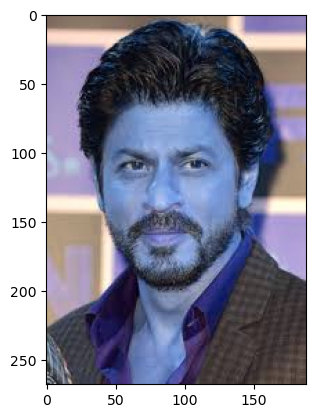

In [59]:
plt.imshow(img)


In [60]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(268, 188)

In [61]:
gray

array([[100, 101, 101, ..., 147, 147, 147],
       [100, 101, 102, ..., 147, 147, 147],
       [101, 101, 102, ..., 148, 148, 148],
       ...,
       [186, 141, 115, ...,  69,  68,  67],
       [153, 174, 181, ...,  68,  68,  67],
       [ 60,  58,  65, ...,  67,  67,  66]], dtype=uint8)

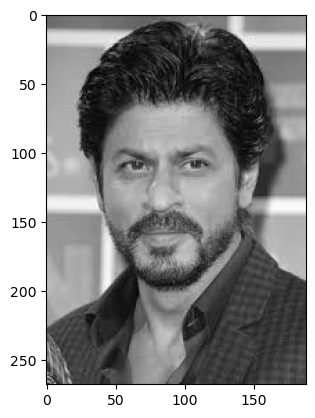

In [62]:
plt.imshow(gray, cmap='gray')


In [63]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 24,  64, 123, 123]])

In [64]:
(x,y,w,h) = faces[0]
x,y,w,h

(24, 64, 123, 123)

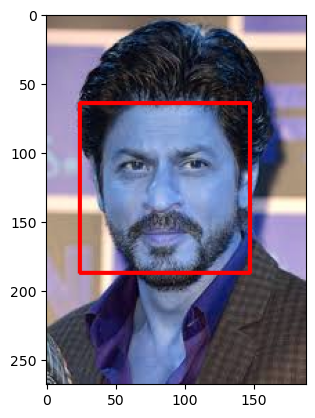

In [65]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

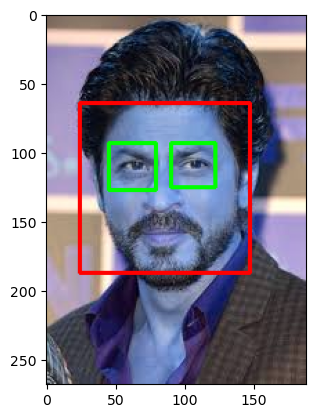

In [66]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

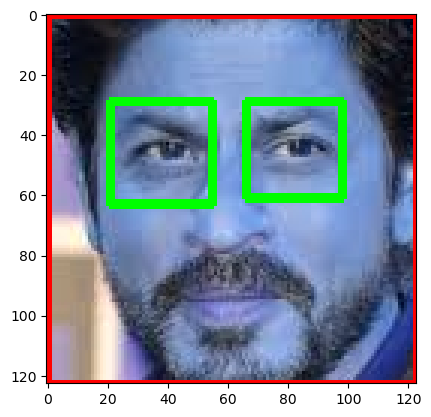

In [67]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [68]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [69]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [70]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [71]:
img_dirs

['./dataset/cropped',
 './dataset/henry_cavill',
 './dataset/hrithik_roshan',
 './dataset/khabib',
 './dataset/srk',
 './dataset/tobey']

In [72]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [73]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            
            count += 1



cropped
henry_cavill
Generating cropped images in folder:  ./dataset/cropped/henry_cavill
hrithik_roshan
Generating cropped images in folder:  ./dataset/cropped/hrithik_roshan
khabib
Generating cropped images in folder:  ./dataset/cropped/khabib
srk
Generating cropped images in folder:  ./dataset/cropped/srk
tobey
Generating cropped images in folder:  ./dataset/cropped/tobey


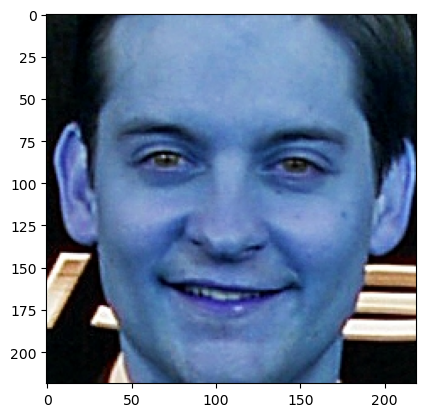

In [74]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [75]:
cropped_img = np.array(roi_color)
cropped_img.shape

(219, 219, 3)

In [76]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

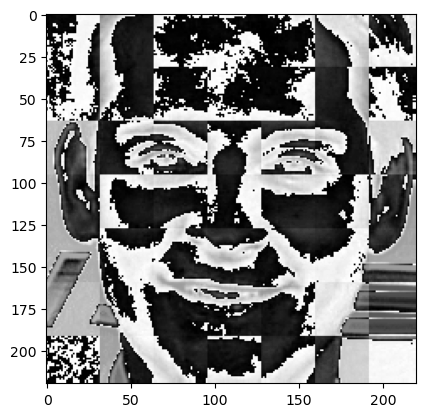

In [77]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [111]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'henry_cavill': ['./dataset/cropped/henry_cavill\\henry_cavill1.png',
  './dataset/cropped/henry_cavill\\henry_cavill10.png',
  './dataset/cropped/henry_cavill\\henry_cavill11.png',
  './dataset/cropped/henry_cavill\\henry_cavill13.png',
  './dataset/cropped/henry_cavill\\henry_cavill14.png',
  './dataset/cropped/henry_cavill\\henry_cavill15.png',
  './dataset/cropped/henry_cavill\\henry_cavill16.png',
  './dataset/cropped/henry_cavill\\henry_cavill17.png',
  './dataset/cropped/henry_cavill\\henry_cavill18.png',
  './dataset/cropped/henry_cavill\\henry_cavill19.png',
  './dataset/cropped/henry_cavill\\henry_cavill2.png',
  './dataset/cropped/henry_cavill\\henry_cavill20.png',
  './dataset/cropped/henry_cavill\\henry_cavill21.png',
  './dataset/cropped/henry_cavill\\henry_cavill22.png',
  './dataset/cropped/henry_cavill\\henry_cavill23.png',
  './dataset/cropped/henry_cavill\\henry_cavill24.png',
  './dataset/cropped/henry_cavill\\henry_cavill25.png',
  './dataset/cropped/henry_cavill\

In [112]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'henry_cavill': 0, 'hrithik_roshan': 1, 'khabib': 2, 'srk': 3, 'tobey': 4}

In [113]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [114]:
len(X[0])

4096

In [115]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(196, 4096)

In [116]:
X[0]

array([136., 139., 153., ..., 223.,   0.,  56.])

In [117]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6122448979591837

In [119]:
len(X_test)

49

In [48]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.56      0.45      0.50        11
           1       0.32      0.70      0.44        10
           2       0.60      0.43      0.50         7
           3       1.00      0.27      0.43        11
           4       0.67      0.67      0.67        12

    accuracy                           0.51        51
   macro avg       0.63      0.50      0.51        51
weighted avg       0.64      0.51      0.51        51



In [49]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [50]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [51]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.766667,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.506667,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.746667,{'logisticregression__C': 1}


In [52]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [53]:
best_estimators['svm'].score(X_test,y_test)

0.6078431372549019

In [54]:
best_estimators['random_forest'].score(X_test,y_test)

0.47058823529411764

In [55]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.6666666666666666

In [376]:
best_clf = best_estimators['svm']

In [377]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 6,  0,  0,  2,  2],
       [ 1,  7,  1,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  1,  7,  1],
       [ 1,  1,  0,  0, 13]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

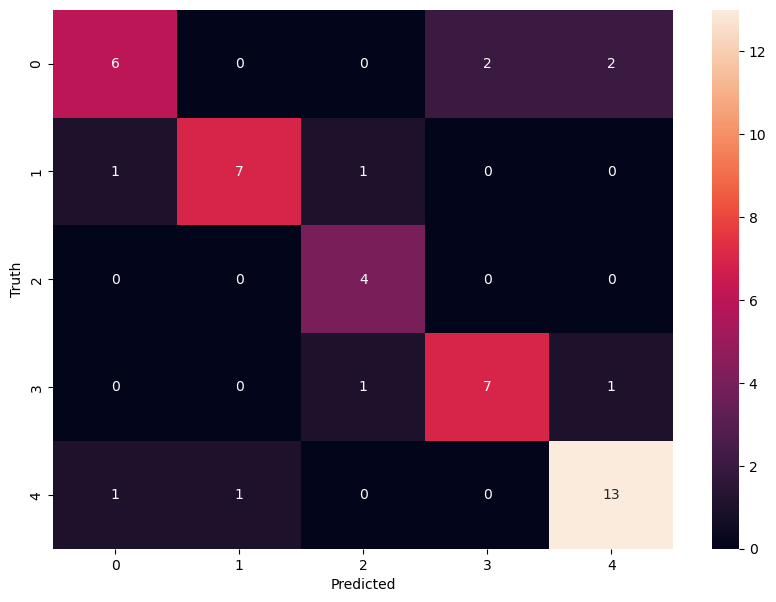

In [378]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [379]:
class_dict

{'hrithik_roshan': 0, 'khabib': 1, 'muhammad_ali': 2, 'srk': 3, 'tobey': 4}

In [380]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [381]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))